In [1]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 277MB/s]
100% 1.06G/1.06G [00:04<00:00, 258MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [7]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [63]:
# Normalise

def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
# Create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 112ms/step - loss: 1.2188 - accuracy: 0.5990 - val_loss: 0.5854 - val_accuracy: 0.6880
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5497 - accuracy: 0.7215 - val_loss: 0.4785 - val_accuracy: 0.7658
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4658 - accuracy: 0.7805 - val_loss: 0.4394 - val_accuracy: 0.7938
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4006 - accuracy: 0.8194 - val_loss: 0.4372 - val_accuracy: 0.8010
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3512 - accuracy: 0.8481 - val_loss: 0.5475 - val_accuracy: 0.7630
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2772 - accuracy: 0.8812 - val_loss: 0.4853 - val_accuracy: 0.7800
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1918 - accuracy: 0.9223 - val_loss: 0.4645 - val_ac

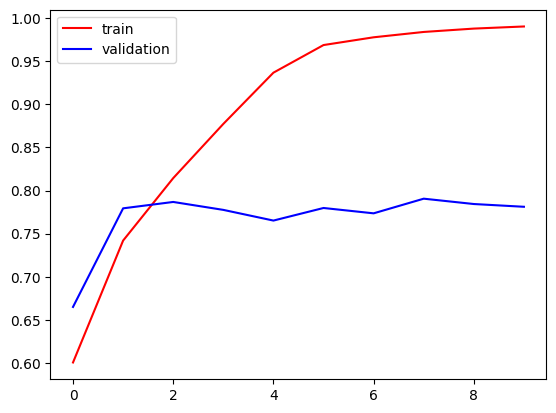

In [14]:
import matplotlib.pyplot as plt
# Before adding dropout and batchnormalization
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

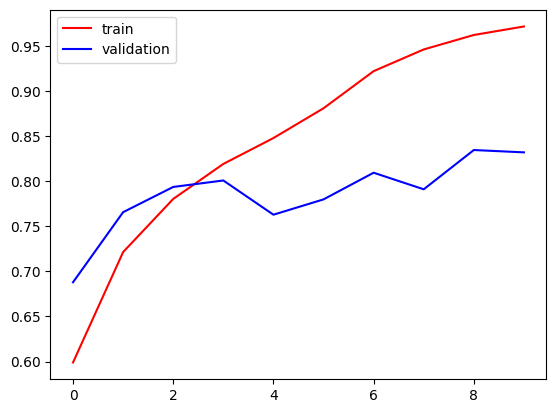

In [21]:
# After adding dropout and batchnormalization
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

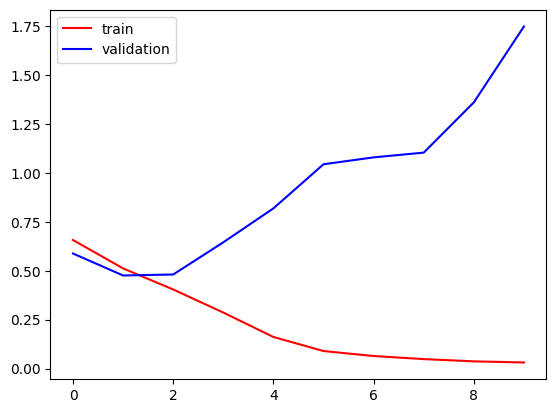

In [15]:
# Before adding dropout and batchnormalization

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

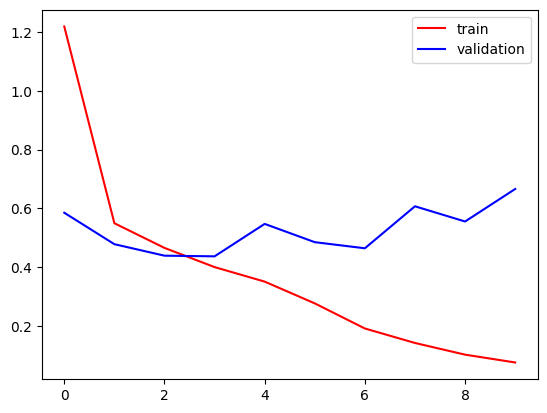

In [22]:
# After adding dropout and batchnormalization
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# it seems to overfitting
# use dropout and batch (changes)

In [23]:
#Prediction

In [24]:
import cv2


In [66]:
test_img = cv2.imread('/content/dog_pic.jpg')

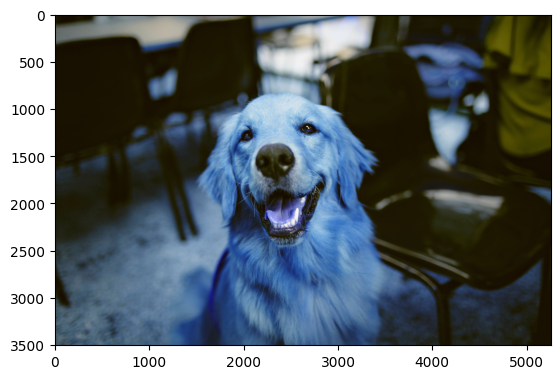

In [67]:
plt.imshow(test_img)

In [68]:
test_img.shape

(3505, 5257, 3)

In [73]:
test_img = cv2.resize(test_img,(256,256))

In [74]:
test_input = test_img.reshape(1,256,256,3)


In [75]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)